# Analysis of contingency tables

## Libraries and settings

In [1]:
# Libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2
from scipy.stats import chi2_contingency

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

## Import the apartment data

In [2]:
# Define columns
columns = ['web-scraper-order',
           'address_raw',
           'rooms',
           'area',
           'price_per_m2',
           'luxurious']

# Read and select variables
df_orig = pd.read_csv("apartments_data_enriched.csv")[columns]

# Rename variable 'web-scraper-order' to 'apmt_id'
df_orig = df_orig.rename(columns={'web-scraper-order': 'apartment_id'})

# Remove missing values
df = df_orig.dropna()
df.head(5)

# Remove duplicates
df = df.drop_duplicates()
df.head(5)

,apartment_id,address_raw,rooms,area,price_per_m2,luxurious
0,1662023695-433,"Sunnenbergstrasse 15, 8633 Wolfhausen, ZH",3.5,122.0,26.07,1
1,1662023720-634,"Blumenbergstrasse 7, 8633 Wolfhausen, ZH",4.0,87.0,19.43,0
2,1662023745-834,"8608 Bubikon, ZH",3.5,92.0,25.54,0
3,1662023701-503,"8608 Bubikon, ZH",3.5,130.0,19.23,0
4,1662023745-820,"Lavaterstr. 63, 8002 Zürich, ZH",2.5,78.0,48.21,0


## Create new categorical variable based on price_per_m2

### Plot histogram of price_per_m2

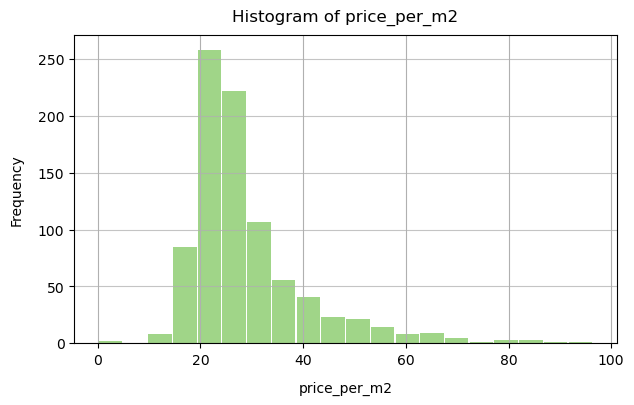

In [3]:
# Plot Histogram
fig = plt.figure( figsize=(7,4))
plt.xticks(fontsize=14, rotation=0)
plt.yticks(fontsize=14, rotation=0)
n, bins, patches = plt.hist(x=df['price_per_m2'], 
                            bins=20, 
                            color='#42AD12',
                            alpha=0.5, 
                            rwidth=0.95
                   )
plt.grid(True)
plt.ticklabel_format(style='plain')
plt.grid(axis='y', alpha=0.75)

# Set labels
plt.xlabel('price_per_m2', fontsize=10, labelpad=10)
plt.ylabel('Frequency', fontsize=10, labelpad=10)
plt.title('Histogram of price_per_m2', fontsize=12, pad=10)

# Set fontsize of tick labels
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

plt.show()

### Show quantiles of price_per_m2

In [4]:
qt_price = df['price_per_m2'].quantile(q=[0.10, 0.25, 0.50, 0.75, 0.90]).round(1)
qt_price

0.10    19.2
0.25    21.8
0.50    25.5
0.75    31.9
0.90    44.1
Name: price_per_m2, dtype: float64

### Create new categorical variable 'price_cat'

In [5]:
# Create labels
labels = ['0 - 19', '20 - 24', '25 - 32', '>= 33']

# Create new categorical variable
df["price_cat"] = pd.cut(df.price_per_m2, bins=[0, 20, 25, 33, 150], labels=labels)

# Check values
df[['price_per_m2', 'price_cat']].head(10)

,price_per_m2,price_cat
0,26.07,25 - 32
1,19.43,0 - 19
2,25.54,25 - 32
3,19.23,0 - 19
4,48.21,>= 33
5,35.38,>= 33
6,49.49,>= 33
7,40.04,>= 33
8,30.69,25 - 32
9,30.77,25 - 32


## Create new categorical variable based on the living area

### Plot histogram of area

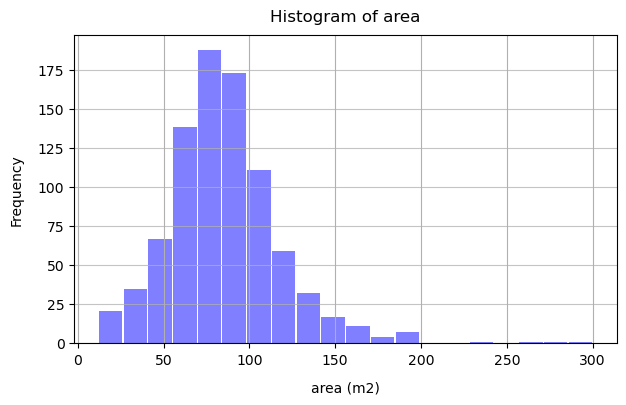

In [6]:
# Plot Histogram
fig = plt.figure( figsize=(7,4))
plt.xticks(fontsize=14, rotation=0)
plt.yticks(fontsize=14, rotation=0)
n, bins, patches = plt.hist(x=df['area'], 
                            bins=20, 
                            color='blue',
                            alpha=0.5, 
                            rwidth=0.95
                   )
plt.grid(True)
plt.ticklabel_format(style='plain')
plt.grid(axis='y', alpha=0.75)

# Set labels
plt.xlabel('area (m2)', fontsize=10, labelpad=10)
plt.ylabel('Frequency', fontsize=10, labelpad=10)
plt.title('Histogram of area', fontsize=12, pad=10)

# Set fontsize of tick labels
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

plt.show()

### Show quantiles of area

In [7]:
qt_area = df['area'].quantile(q=[0.10, 0.25, 0.50, 0.75, 0.90]).round(1)
qt_area

0.10     49.7
0.25     65.0
0.50     82.0
0.75    100.2
0.90    123.0
Name: area, dtype: float64

### Create new categorical variable 'area_cat'

In [8]:
# Create labels
labels = ['0 - 49', '50 - 64', '65 - 84', '85 - 99', '100 - 125', '> 125']

# Create new categorical variable
df["area_cat"] = pd.cut(df['area'], bins=[0, 50, 65, 85, 100, 125, 1000], labels=labels)

# Check values
df[['area', 'area_cat']].head(10)

,area,area_cat
0,122.0,100 - 125
1,87.0,85 - 99
2,92.0,85 - 99
3,130.0,> 125
4,78.0,65 - 84
5,195.0,> 125
6,59.0,50 - 64
7,75.0,65 - 84
8,58.0,50 - 64
9,52.0,50 - 64


## Create contingency table with number of apartments for 'area_cat' versus 'price_cat'

In [9]:
# Contingency table (numbers in the table are apartments)
tab = pd.pivot_table(df[['apartment_id', 'area_cat', 'price_cat']],
                     index=['area_cat'],
                     columns=['price_cat'], 
                     aggfunc='count')
tab

apartment_id                      
price_cat       0 - 19 20 - 24 25 - 32 >= 33
area_cat                                    
0 - 49               0       4      22    66
50 - 64              5      30      54    41
65 - 84             14     102      87    55
85 - 99             37      76      42    16
100 - 125           31      57      37    14
> 125               38      20      13     7

## Select part of the contingency table

In [10]:
# Select part of the contigency table (remember: .iloc[] 
# allows selecting rows and colums using an index 
# .iloc[from row:to row, from column:to column])

tab_sub = tab.iloc[1:3,2:4]
tab_sub

apartment_id      
price_cat      25 - 32 >= 33
area_cat                    
50 - 64             54    41
65 - 84             87    55

## Perform Chi-square test
For details see: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html

In [11]:
# 1-alpha
prob = 0.95

# Chi-squared test
stat, p, dof, expected = chi2_contingency(tab_sub)

# Critical value
critical = chi2.ppf(prob, dof)

# Print results of the Chi-square test
print('Expected frequencies:', '\n', expected.round(4), '\n')
print('Critical value:', critical.round(4), '\n')
print('Test statistic:', stat.round(4), '\n')
print('Degrees of freedom:', dof, '\n')
print(f'p-value: {p:.4f}')

Expected frequencies: 
 [[56.519 38.481]
 [84.481 57.519]] 

Critical value: 3.8415 

Test statistic: 0.2972 

Degrees of freedom: 1 

p-value: 0.5857


## Interpretation of Chi-squared test result

<p>Because the test statistic is smaller than the critical value and the p-value is larger than 0.05, we cannot reject the null hypothesis, i.e. there is no statistically siginificant (5% significance-level) difference in the number of apartments on the market for the selected area- and price categories.</p>

## Applying the Chi-squared test to animal behavior

For full study see: https://davida-rosenstrauch.medium.com/applying-the-chi-squared-test-to-animal-behavior-b6cca3f930b8

<img src="https://miro.medium.com/max/640/1*h5JgsNbUy2tuiLgSrkIlyA.png" width="400" height="500" align="left"/>

### Contingency table

In [12]:
# The table shows how many times each hyena responded with each of our response categories
table = [[0,4],
         [7,6],
         [9,0],
         [15,10]]
table

[[0, 4], [7, 6], [9, 0], [15, 10]]

In [27]:
# Expected frequencies 'by hand'
# 31*4 / 51 = 2.4314
# 31*13 / 51 = 7.902
# 31*9 / 51 = 5.4706
# 31*25 / 51 = 15.1960
# 20*4 / 51 = 1.5686
# 20*13 / 51 = 5.0980
# 20*9 / 51 = 3.5294
# 20*25 / 51 = 9.8039

print('Chi-squared test statistic calculated by hand:')
print('(observed freq - expected freq)**2 / expected freq')
print(((0-2.4314)**2/2.4314) + 
      ((7-7.902)**2/7.902) + 
      ((9-5.4706)**2/5.4706) +
      ((15-15.1960)**2/15.1960) +
      ((4-1.5686)**2/1.5686) +
      ((6-5.0980)**2/5.0980) +
      ((0-3.5294)**2/3.5294) +
      ((10-9.8039)**2/9.8039), '\n')

# 1-alpha
prob = 0.95

# Chi-squared test
stat, p, dof, expected = chi2_contingency(table)

# Critical value
critical = chi2.ppf(prob, dof)

# Print results of the Chi-square test
print('Expected frequencies:', '\n', expected.round(4), '\n')
print('Critical value:', critical.round(4), '\n')
print('Test statistic:', stat.round(4), '\n')
print('Degrees of freedom:', dof, '\n')
print(f'p-value: {p:.4f}')

Chi-squared test statistic calculated by hand:
(observed freq - expected freq)**2 / expected freq
12.27560331131685 

Expected frequencies: 
 [[ 2.4314  1.5686]
 [ 7.902   5.098 ]
 [ 5.4706  3.5294]
 [15.1961  9.8039]] 

Critical value: 7.8147 

Test statistic: 12.2754 

Degrees of freedom: 3 

p-value: 0.0065


### Jupyter notebook --footer info-- (please always provide this at the end of each submitted notebook)

In [14]:
import os
import platform
import socket
from platform import python_version
from datetime import datetime

print('-----------------------------------')
print(os.name.upper())
print(platform.system(), '|', platform.release())
print('Datetime:', datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
print('Python Version:', python_version())
print('-----------------------------------')

-----------------------------------
NT
Windows | 10
Datetime: 2022-11-04 17:56:13
Python Version: 3.9.13
-----------------------------------
